<a href="https://colab.research.google.com/github/PCeltide/Algorithms-in-Machine-Learning-and-Their-Application/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1.0**

**(d)** Create a jupyter-notebook in which you create an array $z$ consisting of 10000 random numbers drawn from $\{0, 1, 2\}$. Implement two versions of a function which counts the number of appearances of the subsequence $(2, 0, 1)$ in $z$. The first version should work with a loop that accesses the array $z$ elementwise and makes elementwise comparisons. The second version should be a vectorized one (Hint: The numpy function `logical_and` might help you), which operates on (almost) the whole array z.Compare the runtime of the two versions.

In [1]:
import numpy as np

In [2]:
z = np.random.randint(low = 0, high = 3, size = 10000)
#print(z)

In [3]:
# Count Occurances through for loop, basic approach
def count_loop_for(z):
  count = 0
  for j in range(len(z) - 2):
    if z[j] == 2 and z[j+1] == 0 and z[j+2] == 1:
      count += 1
  return count

In [4]:
# Count Occurances through while loop, (slightly) less checks
def count_loop_while(z):
  count = 0
  j = 0
  while j < len(z)-2:
    if z[j] == 2:
      if z[j+1] == 0:
        if z[j+2] == 1:
          count += 1
          j += 3
        else:
          j += 2
      else:
        j += 1
    else:
      j += 1
  return count

In [5]:
%%timeit
count_loop_for(z)

4.23 ms ± 879 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
count_loop_while(z)

13.2 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
# Count Occurances through vectorized method
def count_vector(z):
  bool_count = (z[:-2] == 2) & (z[1:-1] == 0) & (z[2:] == 1)
  return np.count_nonzero(bool_count)

In [8]:
%%timeit
count_vector(z)

The slowest run took 5.23 times longer than the fastest. This could mean that an intermediate result is being cached.
61.7 µs ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
# Sanity check
print(count_loop_for(z)==count_vector(z), count_vector(z))

True 376


# **Task 1.1.**

Create $n = 200$ data points in the following way:

**(a)** Draw ten random i.i.d. samples from the two-variate normal distribution $\mathcal{N} \left((\frac{3}{2};0)^\top, \boldsymbol{I}\right)$ and store them in a `numpy` array $\boldsymbol{a}$. Draw another ten samples according to $\mathcal{N} \left((0;\frac{3}{2})^\top, \boldsymbol{I}\right)$  and store them in another numpy array $\boldsymbol{b}$. Use `MatPlotLib` to make a scatter plot (i.e. plot the points in a 2D coordinate system) of the elements in $\boldsymbol{a}$ and the elements in $\boldsymbol{b}$ using different colors for the two arrays.

In [10]:
import matplotlib.pyplot as plt

In [11]:
mean_vector_a, mean_vector_b = np.array([1.5, 0]), np.array([0, 1.5])
cov_mat = np.eye(2)
a, b = np.random.multivariate_normal(mean_vector_a, cov_mat, 10), np.random.multivariate_normal(mean_vector_b, cov_mat, 10)
#print(a)

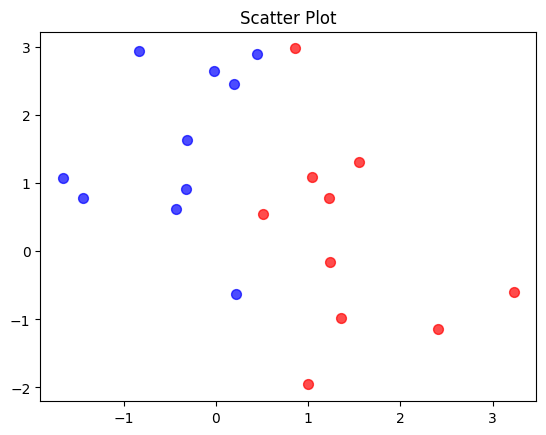

In [12]:
# Plot our scatterplot
plt.scatter(a[:, 0],a[:, 1], color='red', s=50, alpha = 0.7)
plt.scatter(b[:, 0],b[:, 1], color='blue', s=50, alpha = 0.7)
plt.title("Scatter Plot")
#plt.grid(True)
plt.show()

**(b)** Pick 100 equidistributed indices $i_1, \ldots, i_{100}$ from $\{1,2, \ldots, 10\}$ and set the $j$-th data point $\mathbf{x}_j$ to
$$
\mathbf{x}_j:=\underbrace{a\left[i_j\right]}_{i_j \text {-th element of a }}+\varepsilon_j \text { for all } j=1, \ldots, 100 \text { with } \varepsilon_j \sim \mathcal{N}\left((0;0)^{\top}, \frac{1}{4} \mathbf{I}\right) .
$$


Proceed analogously for $j=101, \ldots, 200$ by substituting a by b. Make a scatter plot for the data points $\mathbf{x}_j$ with $j=1, \ldots, 200$ with different colors for the first 100 points and the second 100 points.


In [13]:
i = np.random.randint(0,10,100)
error = np.random.multivariate_normal([0,0], cov_mat * 0.25, 200)
X = np.concatenate((a[i], b[i])) + error
#print(x.shape)

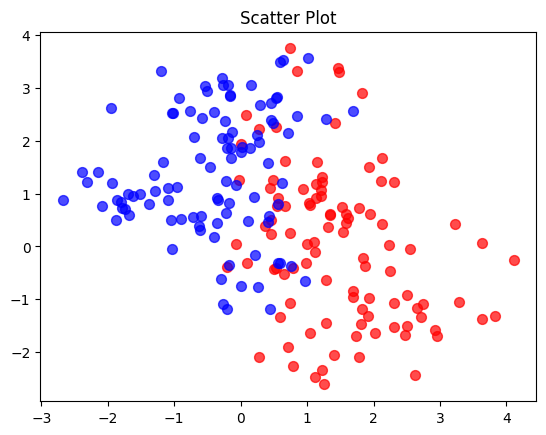

In [14]:
plt.scatter(X[:100, 0], X[:100, 1], color='red', s=50, alpha = 0.7)
plt.scatter(X[100:, 0], X[100:, 1], color='blue', s=50, alpha = 0.7)
plt.title("Scatter Plot")
#plt.grid(True)
plt.show()

**(c)** The first $j=1, \ldots, 100$ data points get the label $\mathbf{y}_j=0$, the next $j=101, \ldots, 200$ ones get $\mathbf{y}_j=1$.

In [15]:
y = np.concatenate((np.zeros(100), np.ones(100)))
#print(y)

# **Task 1.2.**

Implement a linear least squares algorithm, i.e. solve (LLS). Hint: You can use numpy. linalg.solve to solve a system of linear equations. Apply it to the data from Task 1.1. Plot the scattered input data as in step (b) of task 1.1 together with the separating hyperplane, i.e. the contour line given by

$$
\alpha_0+\alpha_1 x_1+\alpha_2 x_2=\frac{1}{2}
$$

where $x_1$ and $x_2$ denote the coordinates in $\mathbb{R}^2$ (not to be confused with the data $\mathbf{x}_i$ ).

In [16]:
# LLS Algorithm
# An important step that needs to be done is that a column of 1's needs to be added to the start of X, to capture the intercept coefficient:
ones = np.ones((X.shape[0], 1))
X_one = np.hstack((ones, X))
#print(X.shape)
coef = X_one.T @ X_one # Coefficient matrix
const = (X_one.T).dot(y) # Constant Matrix
alpha = np.linalg.solve(coef, const) # The quadratic optimization solution
print(alpha)

[ 0.57962184 -0.2440436   0.0689531 ]


In [17]:
def hyper_plotter(X, alpha, points_taken, label=['Class 0', 'Class 1'], grid_points=500, padding=1.0, threshold=0.5): # This is a bit tedious, but using ax and fig allows more control

  # Make a grid for plotting, Add some padding around the data
  fig, ax = plt.subplots()
  # We create boundaries for the plot
  x1_min, x1_max = X[:, 0].min() - padding, X[:, 0].max() + padding
  x2_min, x2_max = X[:, 1].min() - padding, X[:, 1].max() + padding
  # The values we shall "plot"
  x1_vals = np.linspace(x1_min, x1_max, grid_points)
  x2_vals = np.linspace(x2_min, x2_max, grid_points)
  xx1, xx2 = np.meshgrid(x1_vals, x2_vals)
  # Equation to the hyperplane we found above
  equation = alpha[0] + alpha[1] * xx1 + alpha[2] * xx2
  # We color according to hyperplane above
  classification = (equation > threshold).astype(int)
  ax.contourf(xx1, xx2, classification, levels=[-0.5, 0.5, 1.5], colors=['#FFDDDD','#DDDDFF'], alpha=0.7) # Light red/blue using hex, adjust alpha for transparency
  ax.scatter(X[:points_taken, 0], X[:points_taken, 1], color='red', s=50, alpha=0.8, label = label[0])
  ax.scatter(X[points_taken:, 0], X[points_taken:, 1], color='blue', s=50, alpha=0.8, label = label[1])
  ax.set_xlim(x1_min, x1_max)
  ax.set_ylim(x2_min, x2_max)
  ax.legend()
  ax.set_xlabel(r'$x_1$')
  ax.set_ylabel(r'$x_2$')
  ax.set_title(r"Hyperplane $H:\alpha_0 + \alpha_1 x_1 + \alpha_2 x_2=0.5$") # Or a more descriptive title
  plt.show()

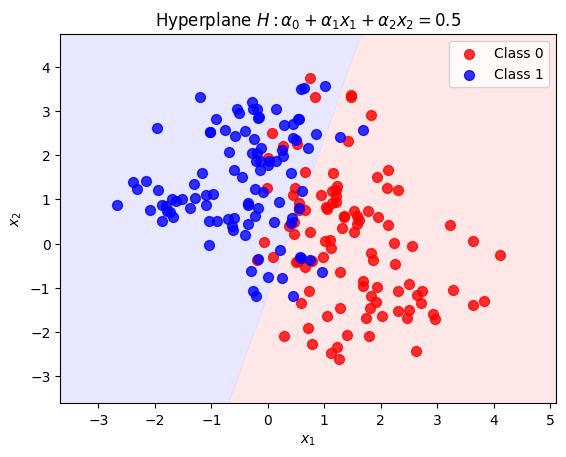

In [18]:
hyper_plotter(X, alpha, 100)

# **Task 1.3.**

Build the so-called confusion matrix for the data and the hyperplane from task 1.2, i.e. a matrix $C$, with entries

$$
C_{i j}=\#\{\text { Points classified as } i, \text { where the real label is } j\} .
$$


In our case this is a $2 \times 2$ matrix with $i, j \in\{0,1\}$ since $|\Gamma|=2$. Calculate the accuracy $\frac{\operatorname{trace}(C)}{n}$.

In [19]:
def hyperplane(x1, x2, alpha):
  return alpha[0] + alpha[1] * x1 + alpha[2] * x2

In [20]:
def confusion_matrix(X, alpha, n, total_points, threshold = 0.5):
  check_class_0 = hyperplane(X[:n, 0], X[:n, 1], alpha) <= threshold
  check_class_1 = hyperplane(X[n:, 0], X[n:, 1], alpha) > threshold
  return np.array([[np.count_nonzero(check_class_0), n - np.count_nonzero(check_class_0)],[total_points - n - np.count_nonzero(check_class_1), np.count_nonzero(check_class_1)]])
#print(f"Confusion Matrix {C}")
C = confusion_matrix(X,alpha, 100, 200)
accuracy = np.trace(C)/200
print(f"Accuracy = {accuracy}")

Accuracy = 0.875


# **Task 1.4.**

Create 10 000 test points for each of the two classes in the same way as you created the training data in step (b) of task 1.1. Evaluate the LLS classifier, which was previously built on the training data, on the test data (Do not(**!**) compute a new LLS classiőer on the test data set!) and compute the confusion matrix and the accuracy of the test data. Compare your results to the ones from task 1.3.

In [21]:
# Make new data
i_big = np.random.randint(0,10,10000)
error = np.random.multivariate_normal([0,0], cov_mat * 0.25, 20000)
X_test = np.concatenate((a[i_big], b[i_big])) + error
C_test = confusion_matrix(X_test, alpha, 10000, 20000)
#print(C_test)
accuracy_test = np.trace(C_test)/20000
print(f"Test Accuracy = {accuracy_test}")

Test Accuracy = 0.8816


As we see, the accuracy of our classifier for our test is quite similar to the accuracy on the points used to derive the classifier!

Next, we will try our LLS classiőer on real-world data, namely the Iris dataset. The dataset consists of 150 points, which describe three different types of Iris plants. We have three classes
$$\{\textrm{Iris-setosa, Iris-versicolor, Iris-virginica}\}.$$ The four features, i.e. the coordinates in $\Omega = \mathbb{R}^4$ refer to certain length and width measurements of the plants.

In [22]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]

In [23]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
# Set the path to the file you'd like to load
file_path = "Iris.csv"

# Load the latest version
irisDataFrame = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/iris",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-23-a9774c16f5fb>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  irisDataFrame = kagglehub.load_dataset(


100%|██████████| 4.99k/4.99k [00:00<00:00, 6.58MB/s]


In [24]:
print("First 5 records:", irisDataFrame.head())

First 5 records:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


**Task 1.5.** Make yourself familiar with the basics of `PANDAS`.

(a) Read in the Iris data set and use the data labels $\mathbf{y}_i=0$ for the Iris-setosa instances and $\mathbf{y}_i=1$ for the Iris-versicolor and Iris-virginica classes:


1.    Run the LLS algorithm by using only the first two dimensions of $\Omega$ in the input data, i.e. we only look at the first two features. Plot the scattered data and the separating hyperplane as in task 1.2.
2.   Now run the LLS algorithm by using all four features/dimensions of the input data. Compute the confusion matrix and the accuracy.

In [25]:
Sep_len = np.array(irisDataFrame.iloc[:, 1]) # Sepal Length
Sep_wid = np.array(irisDataFrame.iloc[:, 2]) # Sepal Width
Pet_len = np.array(irisDataFrame.iloc[:, 3]) # Petal Length
Pet_wid = np.array(irisDataFrame.iloc[:, 4]) # Petal Length
Species = np.array(irisDataFrame.iloc[:, 5]) # Petal Length
size = Sep_len.size

optimal alpha: [ 0.20690705  0.37708418 -0.57094595]


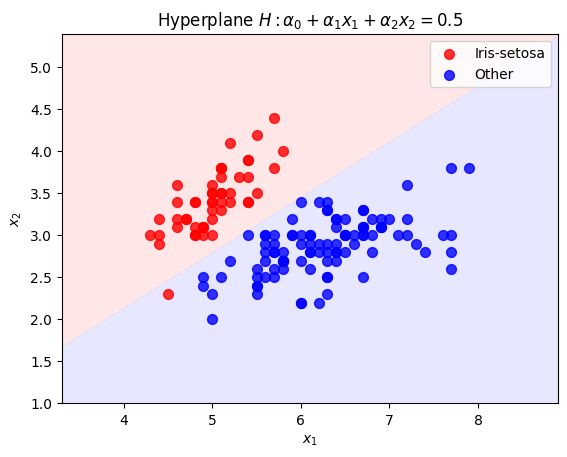

In [26]:
# (a.1.)

X_ones = np.vstack((np.ones(size), Sep_len, Sep_wid)).T
X = X_ones[:,1:]
#print(X.shape)
y = (Species != "Iris-setosa").astype(int) # astype reads the array as integer entries
alpha = np.linalg.solve(X_ones.T @ X_ones, (X_ones.T).dot(y))
print(f"optimal alpha: {alpha}")
hyper_plotter(X,alpha, np.argmax(y), label = ['Iris-setosa', 'Other'])

In [27]:
C = confusion_matrix(X, alpha, np.argmax(y), size)
accuracy = np.trace(C)/size
print(f"Accuracy for Iris-setosa = {accuracy:.2f}")

Accuracy for Iris-setosa = 0.99


In [28]:
# (b.1.)

def hyperplane_4d(x1, x2, x3, x4, alpha):
  return alpha[0] + alpha[1] * x1 + alpha[2] * x2 + alpha[3] * x3 + alpha[4] * x4

def confusion_matrix_4d(X, alpha, n, total_points):
  check_class_0 = hyperplane_4d(X[:n, 0], X[:n, 1], X[:n, 2], X[:n, 3], alpha) <= 0.5
  check_class_1 = hyperplane_4d(X[n:, 0], X[n:, 1], X[n:, 2], X[n:, 3], alpha) > 0.5
  return np.array([[np.count_nonzero(check_class_0), n - np.count_nonzero(check_class_0)],[total_points - n - np.count_nonzero(check_class_1), np.count_nonzero(check_class_1)]])

In [29]:
X_ones = np.vstack((np.ones(size), Sep_len, Sep_wid, Pet_len, Pet_wid)).T
X = X_ones[:,1:]
alpha = np.linalg.solve(X_ones.T @ X_ones, (X_ones.T).dot(y))
#print(alpha)
C = confusion_matrix_4d(X, alpha, np.argmax(y), size)
#print(C)
accuracy = np.trace(C)/size
print(f"Accuracy for Iris-setosa, 4 dimensions = {accuracy:.2f}")

Accuracy for Iris-setosa, 4 dimensions = 1.00


(b) Finally, run the same two steps as in (a), but now try to classify Irisversicolor instances (label $\mathbf{y}_i=0$ ) against both Iris-setosa and Iris-virginica (label $\mathbf{y}_i=1$ ). What do you observe?

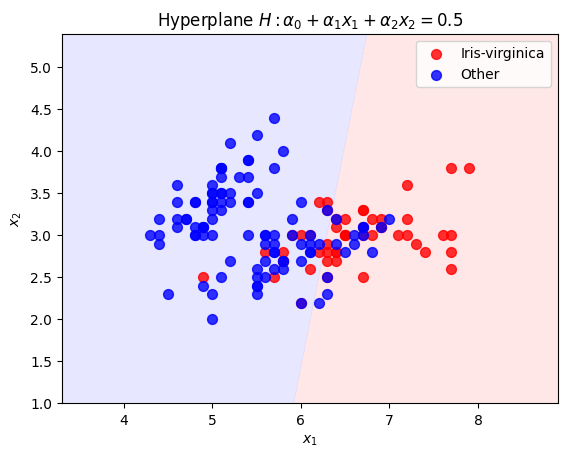

In [30]:
X_ones = np.vstack((np.ones(size), Sep_len, Sep_wid)).T
X = X_ones[:,1:]
#print(X.shape)
y = (Species != "Iris-virginica").astype(int) # astype reads the array as integer entries
alpha = np.linalg.solve(X_ones.T @ X_ones, (X_ones.T).dot(y))
#print(alpha)
# We do a bit of a gimmick here, to make sure we can use hyperplotter the way it is designed
# What we do is rearrange y to have its entries at the start be 0, and rearrange X correspondingly!
sorted_indices = np.argsort(y, kind='stable') # Use 'stable' sort if relative order within 0s/1s matters
X_reordered = X[sorted_indices]
y_reordered = y[sorted_indices]
hyper_plotter(X_reordered, alpha, np.argmax(y_reordered), label = ['Iris-virginica', 'Other'])

In [31]:
C = confusion_matrix(X_reordered, alpha, np.argmax(y_reordered), size)
accuracy = np.trace(C)/size
print(f"Accuracy for Iris-virginica = {accuracy:.2f}")

Accuracy for Iris-virginica = 0.81


In [32]:
X_ones = np.vstack((np.ones(size), Sep_len, Sep_wid, Pet_len, Pet_wid)).T
X = X_ones[:,1:]
alpha = np.linalg.solve(X_ones.T @ X_ones, (X_ones.T).dot(y))
#print(alpha)
X_reordered = X[sorted_indices]
C = confusion_matrix_4d(X_reordered, alpha, np.argmax(y_reordered), size)
#print(C)
accuracy = np.trace(C)/size
print(f"Accuracy for Iris-virginica, 4 dimensions = {accuracy:.2f}")

Accuracy for Iris-virginica, 4 dimensions = 0.93


As we see in both cases, we have improvements with higher dimensions, as we get more data. Moreover, with Iris-setosa we see perfect classification, while this is not the case for Iris-virginica.

A gradient descent approach corresponds to the following pseduo-algorithm:

```
# Initialize alpha randomly
step = 0
while (not converged) and (step < maxSteps):
    alpha = alpha - nu * grad(J(alpha))
    step = step + 1
```



# **Task 1.6.**

Implement the gradient descent method and run an LLS algorithm with a gradient descent optimizer for the data from task 1.5 (a.1.). Choose $v \in\left\{1,10^{-1}, 10^{-2}, \ldots\right\}$ as the largest value such that convergence is achieved. Create a plot of the value of $J$ vs. the actual iteration number. What do you observe?

In [33]:
def J_gf(alpha, X, y, n):
  error = X @ alpha - y
  cost = (1/n) * np.sum(error**2)
  return cost

Observe that $\nabla_\alpha J(\alpha) = \frac{2}{n}\hat{X}^\top (\hat{X}\alpha-y)$.

In [34]:
def grad_J(alpha, X, y, n):
  return (2/n) * X.T @ (X @ alpha - y)

In [35]:
X_ones = np.vstack((np.ones(size), Sep_len, Sep_wid)).T
y = (Species != "Iris-setosa").astype(int)
alpha_pick = np.random.rand(3) # Initialize alpha randomly
#print(f"alpha pick: {alpha_pick}")

In [36]:
def gd_opt(alpha_pick, X_ones, y, size ,max_steps=20000, threshold=1e-3):
  steps = 0
  converge = False
  nu = 1
  values_J = np.array([J_gf(alpha_pick, X_ones, y, size)])
  while nu >= 1e-5:
    alpha = np.copy(alpha_pick) # It's important we start at alpha at each process for a given nu
    history = np.copy(values_J)
    while steps < max_steps:
      gradient = grad_J(alpha, X_ones, y, size)
      if np.linalg.norm(gradient) <  threshold:
        print(f"Converged with nu = {nu} after {steps} steps.")
        converge = True
        break
      #print(gradient)
      alpha = alpha - nu * (gradient)
      history = np.append(history, J_gf(alpha, X_ones, y, size))
      steps += 1
    if converge:
      break
    steps = 0
    nu = nu/10.0
  if converge:
    print(f"Success alpha {alpha}")
    #print(history)
  else:
    print("Fail")
  return alpha, history

In [37]:
alpha, history = gd_opt(alpha_pick, X_ones, y, size, max_steps=50000, threshold=1e-5)

<ipython-input-33-3dfc1def8054>:3: RuntimeWarning: overflow encountered in square
  cost = (1/n) * np.sum(error**2)
<ipython-input-33-3dfc1def8054>:2: RuntimeWarning: overflow encountered in matmul
  error = X @ alpha - y
<ipython-input-36-dd3718176df7>:16: RuntimeWarning: invalid value encountered in subtract
  alpha = alpha - nu * (gradient)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Converged with nu = 0.01 after 37064 steps.
Success alpha [ 0.20633087  0.37713239 -0.57085114]


Note those minor errors we see are due to the exploding gradient at higher values of $\nu$

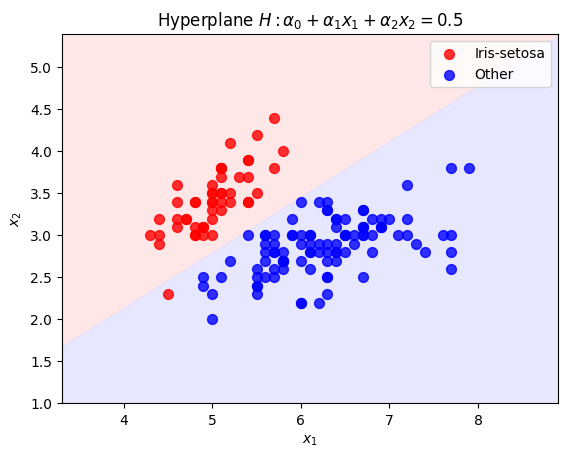

In [38]:
X = X_ones[:,1:]
hyper_plotter(X, alpha, np.argmax(y), label = ['Iris-setosa', 'Other'])

In [39]:
C = confusion_matrix(X, alpha, np.argmax(y), size)
accuracy = np.trace(C)/size
print(f"Accuracy for Iris-setosa, Gradient Descent = {accuracy:.2f}")

Accuracy for Iris-setosa, Gradient Descent = 0.99


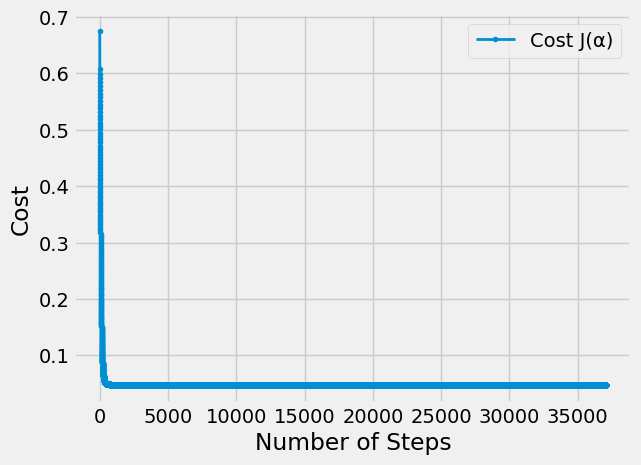

In [40]:
values_J = np.copy(history)
x_axis = np.arange(0,values_J.size)
#plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.plot(x_axis[1:], values_J[1:], marker='o', linewidth=2, markersize=3, label=f'Cost J(α)')
plt.xlabel('Number of Steps')
plt.ylabel('Cost')
plt.legend()
plt.show()
plt.rcdefaults()

We observe that with each step, the value of $J(\alpha)$ reduces (exponentially)!

# **Task 1.7.**

Normalize the data from task 1.5 (a.1.). To this end, calculate the mean $\mu_j$ and the standard deviation $\sigma_j$ for each feature $j$ (i.e. each coordinate direction $j$ of the data set) and set the $j$-th component of the $i$-th data point to

$$
\left[\mathbf{x}_i\right]_j:=\frac{\left[\mathbf{x}_i\right]_j-\mu_j}{\sigma_j}
$$


Now run the gradient descent LLS algorithm on the normalized data. Again, choose $v$ as the largest value such that convergence is achieved. Compare the first 100 iteration steps by plotting the value of J vs. the iteration number for both the normalized and the unnormalized case. What do you observe?

In [41]:
def normed(X):
  mean = np.mean(X, axis=0)
  sd = np.std(X, axis=0)
  return (X - mean)/sd

In [42]:
X_normed = normed(X)
X_ones_normed = np.hstack((np.ones((size,1)), X_normed))
#print(X_ones_normed.shape)
#print(X_normed.shape)

In [43]:
alpha, history = gd_opt(alpha_pick, X_ones_normed, y, size, max_steps=50000, threshold=1e-5)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-33-3dfc1def8054>:3: RuntimeWarning: overflow encountered in square
  cost = (1/n) * np.sum(error**2)
<ipython-input-33-3dfc1def8054>:2: RuntimeWarning: overflow encountered in matmul
  error = X @ alpha - y
<ipython-input-34-2c0d0e53e0d3>:2: RuntimeWarning: invalid value encountered in matmul
  return (2/n) * X.T @ (X @ alpha - y)


Converged with nu = 0.1 after 60 steps.
Success alpha [ 0.66666576  0.31121115 -0.24672888]


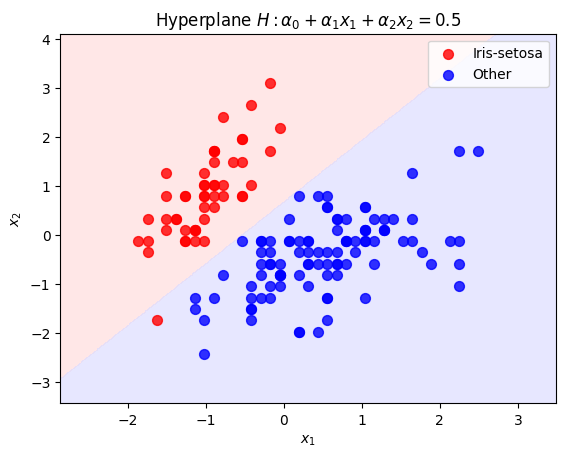

In [44]:
hyper_plotter(X_normed, alpha, np.argmax(y), label = ['Iris-setosa', 'Other'])

In [45]:
C = confusion_matrix(X_normed, alpha, np.argmax(y), size)
accuracy = np.trace(C)/size
print(f"Accuracy for Iris-setosa, Normalized Gradient Descent = {accuracy:.2f}")

Accuracy for Iris-setosa, Normalized Gradient Descent = 0.99


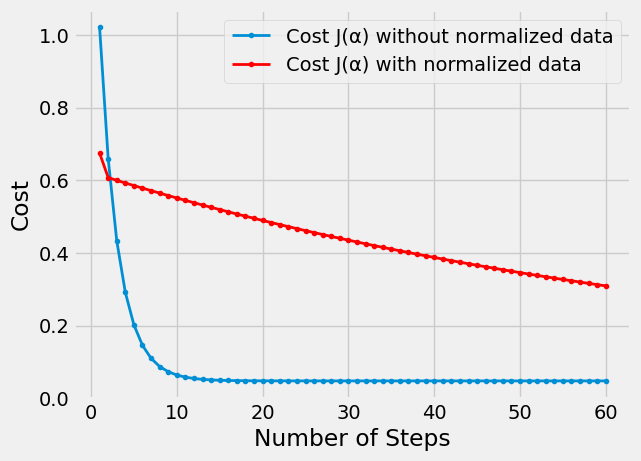

In [46]:
# Compare the change over the steps
x_axis = np.arange(0,values_J.size)
#plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.plot(x_axis[1:history.size], history[1:history.size], marker='o', linewidth=2, markersize=3, label=f'Cost J(α) without normalized data')
plt.plot(x_axis[1:history.size], values_J[1:history.size], marker='o', linewidth=2, markersize=3, label=f'Cost J(α) with normalized data', color='red')
plt.xlabel('Number of Steps')
plt.ylabel('Cost')
plt.legend()
plt.show()
plt.rcdefaults()

What we observe is two things: the value of $J(\alpha)$ in the normalized data delays linearly to zero, while at the same time, the optimization algorithm requires far less steps to achieve.

# **Task 1.8.**

**$k$-nearest neighbor algorithm**: Here, a data point $\mathbf{x}$ from a test set is assigned a specific mean of training data values

$$
\text { nearNeigh }_k(\mathbf{x})=\frac{1}{k} \sum_{\left\{i \mid \mathbf{x}_i \in N_k(\mathbf{x})\right\}} \mathbf{y}_i,
$$

where $N_k(\mathbf{x})$ are the closest $k$ training points to $\mathbf{x}$. For a two class problem $(\Gamma=\{0,1\})$, the data point $\mathbf{x}$ would be assigned to class 0 if $\textrm{nearNeigh}_k(\mathbf{x})<0.5$ and to class 1 otherwise. If nearNeigh ${ }_k(\mathbf{x})=0.5$ you can choose which class to assign to $\mathbf{x}$.



Implement the $k$-nearest neighbor algorithm (Hint: Have a look at numpy's `argpartition` function). There are many possible ways to calculate the pairwise distances between data sets. For instance, you can use the `scipy.spatial.distance` library. Run the algorithm with $k=1, k=15$ and $k=30$ and calculate the confusion matrix and the accuracy for the data set from task 1.1 (using it as training and test data set). Make a scatter plot of the data and plot the separation level set, i.e. the contour of nearNeigh ${ }_k(\mathbf{x})=\frac{1}{2}$.

In [47]:
from scipy.spatial import distance

In [48]:
  # k-nearest aglo
  def nearest_neighbours(x_test, data_train, y_train, k):
    # Reshape the vector x to have one row
    dist_mat = distance.cdist(x_test, data_train, metric='euclidean')
    neigh_indx = np.argpartition(dist_mat, k-1, axis = 1)[:, :k]
    return np.mean(y_train[neigh_indx], axis = 1)

In [49]:
def confusion_matrix_neigh(classi, y_test,total_points):
  check_class = classi == y_test
  count_0 = np.count_nonzero(check_class[:total_points//2])
  count_1 = np.count_nonzero(check_class[total_points//2:])
  return np.array([[count_0, total_points//2 - count_0],[total_points//2 - count_1 , count_1]])

In [50]:
# Data Generation from Task 1.4.
mean_vector_a, mean_vector_b = np.array([1.5, 0]), np.array([0, 1.5])
cov_mat = np.eye(2)
a, b = np.random.multivariate_normal(mean_vector_a, cov_mat, 10), np.random.multivariate_normal(mean_vector_b, cov_mat, 10)
i = np.random.randint(0,10,100)
error = np.random.multivariate_normal([0,0], cov_mat * 0.25, 200)
X = np.concatenate((a[i], b[i])) + error
y = np.concatenate((np.zeros(100), np.ones(100)))

In [51]:
for k in [1,15,30]:
  classi = (nearest_neighbours(X, X, y, k) > 0.5).astype(int)
  C = confusion_matrix_neigh(classi, y, 200)
  #print(f"k={k}, Confusion Matrix {C}")
  accuracy = (np.trace(C)/200)
  print(f"For k={k}, Accuracy = {accuracy}")

For k=1, Accuracy = 1.0
For k=15, Accuracy = 0.975
For k=30, Accuracy = 0.97


# **Task 1.9.**

Let us test how the algorithm performs for every possible $k$.

**(a)** Run the $k$-nearest neighbors algorithm for the data from task 1.1 for all $k=1, \ldots, 200$ and store the accuracy for each $k$.

In [52]:
data_accuracy = np.zeros(200)
for k in np.arange(1,201):
  classi = (nearest_neighbours(X, X, y, k) > 0.5).astype(int)
  C = confusion_matrix_neigh(classi, y, 200)
  #print(f"k={k}, Confusion Matrix {C}")
  data_accuracy[k-1] = (np.trace(C)/200)
#print(f"Accuracy = {accuracy}")

**(b)** Do the same thing as in step (a) but now use the data created in task 1.4 as test data.

In [53]:
# Test Set
i_big = np.random.randint(0,10,10000)
error = np.random.multivariate_normal([0,0], cov_mat * 0.25, 20000)
X_test = np.concatenate((a[i_big], b[i_big])) + error
y_test = np.concatenate((np.zeros(10000), np.ones(10000)))

In [54]:
# Finding accuracy based on k
test_accuracy = np.zeros(200)
for k in np.arange(1,201):
  classi = (nearest_neighbours(X_test, X, y, k) > 0.5).astype(int)
  C = confusion_matrix_neigh(classi, y_test, 20000)
  #print(f"k={k}, Confusion Matrix {C}")
  test_accuracy[k-1] = (np.trace(C)/20000)
print(f"Accuracy = {test_accuracy}")

Accuracy = [0.9408  0.9374  0.95045 0.9472  0.95405 0.9543  0.95485 0.9533  0.95485
 0.95315 0.9552  0.9545  0.9566  0.9562  0.9563  0.9552  0.9559  0.9556
 0.95545 0.95455 0.95455 0.95355 0.95465 0.954   0.9545  0.9541  0.95465
 0.954   0.953   0.9534  0.9539  0.9541  0.9529  0.9536  0.9527  0.9524
 0.9527  0.95215 0.9538  0.95355 0.9537  0.9534  0.9537  0.95295 0.95305
 0.9533  0.953   0.953   0.9521  0.9512  0.9508  0.951   0.9512  0.9506
 0.95105 0.94975 0.95135 0.95165 0.95145 0.95165 0.95055 0.95125 0.9487
 0.9493  0.9489  0.9491  0.94775 0.94915 0.94635 0.94795 0.9461  0.9471
 0.94345 0.9449  0.9415  0.94265 0.9395  0.94065 0.9396  0.9404  0.93735
 0.9386  0.93415 0.9356  0.9337  0.93545 0.9332  0.9338  0.9323  0.9336
 0.9315  0.93375 0.93275 0.93425 0.93195 0.93305 0.9312  0.9334  0.9321
 0.9339  0.9308  0.93395 0.9313  0.93265 0.93195 0.9357  0.9343  0.9358
 0.93355 0.93515 0.93345 0.93505 0.9338  0.93475 0.93415 0.9347  0.9336
 0.9348  0.93345 0.9347  0.93195 0.9344  0.93215 

**(c)** Plot the accuracies from steps (a) and (b) vs. the value of $k$. What do you observe?

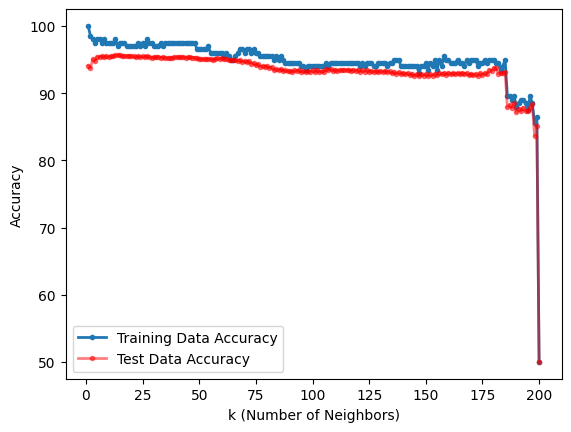

In [55]:
# Compare the change over the steps
x_axis = np.arange(1,201)
#plt.figure(figsize=(10, 6))
#plt.style.use('fivethirtyeight')
plt.plot(x_axis, data_accuracy*100, marker='o', linewidth=2, markersize=3, label='Training Data Accuracy')
plt.plot(x_axis, test_accuracy*100, marker='o', linewidth=2, markersize=3, label='Test Data Accuracy', color='red', alpha = 0.5)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.rcdefaults()

There are a few observations:


1.   At $k=1$, the training accuracy is 100%, as each point simply uses its own label.
2.   After an increase, there seems to be a gradual decline (though not linear) in the accuracy with the increase of $k$ for the test accuracy
3. At $k=200$, the accuracy is 50% as it considers all points in the training data as its neighbours, whose average is always $0.5$ and will be classified accordingly

